In [ ]:
!pip install mediapipe opencv-python matplotlib




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from mediapipe.tasks import python
from mediapipe.tasks.python.vision import face_detector

Saving images (2).jfif to images (2) (1).jfif


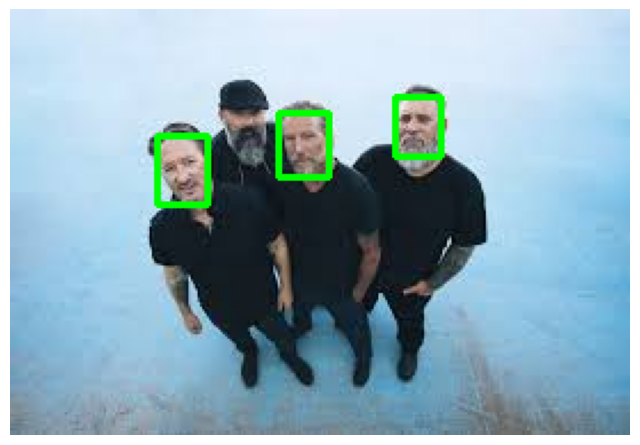

In [ ]:
!wget -q https://github.com/opencv/opencv/raw/master/samples/dnn/face_detector/deploy.prototxt -O deploy.prototxt
!wget -q https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel -O res10_300x300_ssd_iter_140000.caffemodel

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img = cv2.imread(image_path)
(h, w) = img.shape[:2]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

blob = cv2.dnn.blobFromImage(cv2.resize(img_rgb, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()

for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        cv2.rectangle(img_rgb, (startX, startY), (endX, endY), (0, 255, 0), 2)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()